Select the top 5 listed consumer companies

As you have just learned, it is possible to filter stocks based on criteria with the sort_values() method and an argument that specifies the column to filter by. Additionally, you can include the argument ascending=False to sort entries from highest to lowest.

Here, you will use this function to find out the five most valuable companies in the Consumer Services sector. This is measured with market capitalization, or the combined value of all shares in a company. pandas has been imported as pd, as has the listings DataFrame from the first chapter. As a refresher, it contains data from the AMEX, NYSE, and NASDAQ.

In [22]:
import pandas as pd
# Import the data
listings = pd.read_excel('listings.xlsx', sheet_name='nyse' , na_values='n/a')

In [23]:
listings.columns

Index(['Stock Symbol', 'Company Name', 'Last Sale', 'Market Capitalization',
       'IPO Year', 'Sector', 'Industry'],
      dtype='object')

In [24]:
listings.Sector.unique()

array(['Technology', 'Health Care', 'Consumer Services', 'Capital Goods',
       'Consumer Durables', nan, 'Finance', 'Miscellaneous',
       'Consumer Non-Durables', 'Public Utilities', 'Basic Industries',
       'Energy', 'Transportation'], dtype=object)

In [25]:
# Select companies in Consumer Services
consumer_services = listings[listings.Sector == 'Consumer Services']

# Sort consumer_services by market cap
consumer_services2 = consumer_services.sort_values('Market Capitalization', ascending=False)

# Display first 5 rows of designated columns
print(consumer_services2[['Company Name', 'Market Capitalization']].head())

                    Company Name  Market Capitalization
3013       Wal-Mart Stores, Inc.           2.218646e+11
3014   Walt Disney Company (The)           1.789973e+11
1438      Home Depot, Inc. (The)           1.752626e+11
1804  McDonald&#39;s Corporation           1.070915e+11
2801            Time Warner Inc.           7.608609e+10


Get the ticker of the largest consumer services company

Google Finance has deprecated their API but DataReader now makes available the data source 'iex' that provides the same functionality. To experiment with the data outside DataCamp environment, you will need an IEX Cloud account.

Instead of indexing your data with a conditional expression, you can also filter by certain values with .loc[row_selector, column_selector]. Additionally, you can use .set_index() to set a particular column with unique values as the index of a DataFrame, and .idxmax() to return the index of the maximum value.

In this exercise, you will apply these methods of selecting companies to find the most valuable consumer services company on any of the three exchanges, and use its ticker to plot its stock price trend. DataReader, date, pandas as pd, and matplotlib.pyplot as plt have been imported, as has the listings DataFrame from the last exercise.

In [26]:
#import necessary libraries
from datetime import date
from pandas_datareader.data import DataReader
from pandas.util.testing import assert_frame_equal
import matplotlib.pyplot as plt

In [33]:
#import IEX Finance
from iexfinance.stocks import Stock
from iexfinance.stocks import get_historical_data
api_key ="pk_0edffb8ac8154981b67159ab616d0643"

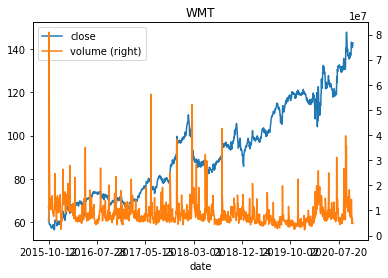

In [34]:
# Set the index of listings to Stock Symbol
listings_ss = listings.set_index('Stock Symbol')

# Get ticker of the largest Consumer Services company
ticker = listings_ss.loc[listings_ss.Sector=='Consumer Services', 'Market Capitalization'].idxmax()

# Set the start date
start = date(2015,1,1)

# Import the stock data
data = DataReader(ticker, 'iex', start, api_key = api_key)

# Plot close and volume
data[['close', 'volume']].plot(secondary_y='volume', title=ticker)

# Show the plot
plt.show()

Get the largest consumer company listed after 1998

Here, you will find out which company is the largest consumer services company that went public after Amazon did in 1997. The data is contained in the column 'IPO Year'; an Initial Public Offering (IPO) is a financial term that describes the first time that the stock of a private company is offered to the public.

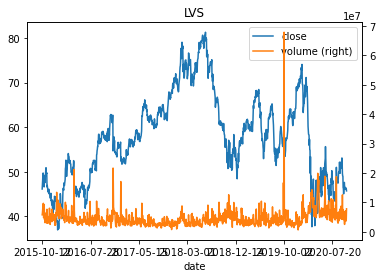

In [35]:
# Get ticker of the largest consumer services company listed after 1997
tickers = listings_ss.loc[(listings_ss.Sector == 'Consumer Services') & (listings_ss ['IPO Year'] > 1998.0),
                      'Market Capitalization'].idxmax()

# Set the start date
start = date(2015,1,1)

# Import the stock data
data = DataReader(tickers,'iex',start, api_key = api_key)

# Plot close and volume
data[['close', 'volume']].plot(secondary_y='volume', title=tickers)

# Show the plot
plt.show()

Get data for the 3 largest financial companies

In [37]:
# Get ticker of 3 largest finance companies
top_3_companies = listings_ss.loc[listings_ss.Sector =='Finance','Market Capitalization'].nlargest(n=3)

# Convert index to list
top_3_tickers = top_3_companies.index.tolist()

# Set start date
start = date(2015,1,1)

# Set end date
end = date(2020,4,1)

# Import stock data
result = DataReader(top_3_tickers,'iex', start,end, api_key = api_key)
result = result[~result.index.duplicated()]
data = pd.DataFrame()

# pd.MultiIndex() object has more than one identifier per row.
# This allows you to get the data based on criteria for multiple companies at once.
# We are then creating a DataFrame by iterating over the ticker-data pairs and
# create a MultiIndex by appending 'ticker' to 'date' in the Index.

for ticker in result.columns.levels[1]:
    index = pd.MultiIndex.from_arrays([
            [ticker] * len(result),
            result.index.values
            ], names=['ticker', 'date'])
    ticker_df = pd.DataFrame(index=index)
    for col in result.columns.levels[0]:
        ticker_df[col] = result[col][ticker].values
    data = pd.concat([data, ticker_df])

# Unstack and inspect result
data['close'].unstack().info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, BAC to WFC
Columns: 1126 entries, 2015-10-12 to 2020-04-01
dtypes: float64(1126)
memory usage: 26.4+ KB
